In [2]:
from PIL import Image
import os, glob
import numpy as np
import tensorflow as tf
from tensorflow import keras

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


### 이미지 크기 변경

 - 모델에 학습을 위해 기존의 이미지 데이터를 28 X 28 크기로 변경하여 줍니다

In [ ]:
import os
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/Aiffel/01_rock_scissor_paper/data/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서

image_dir_path = os.getenv("HOME") + "/Aiffel/01_rock_scissor_paper/data/rock"
images = glob.glob(image_dir_path + "/*.jpg")
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("바위 이미지 resize 완료!")


# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/Aiffel/01_rock_scissor_paper/data/paper"
images = glob.glob(image_dir_path + "/*.jpg")
# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.

target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")
    
print("보 이미지 resize 완료!")

### Train 데이터 불러오기 

 - 학습을 위한 데이터를 불러오는 함수

In [5]:
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=4695   # 가위바위보 이미지 개수 총합
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/HDD/Dev/Aiffel/01_rock_scissor_paper/data"

(x_train, y_train)=load_data(image_dir_path)

x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화


print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 4695 입니다.
x_train shape: (4695, 28, 28, 3)
y_train shape: (4695,)


라벨:  0


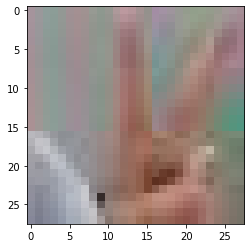

In [7]:
import matplotlib.pyplot as plt
plt.imshow(x_train_norm[0])
print('라벨: ', y_train[0])

In [3]:
n_channel_1=32
n_channel_2=64
n_dense=32
n_train_epoch = 20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                51232     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9

### 모델 학습

In [ ]:
# model을 학습시키는 코드를 직접 작성해 보세요.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

### Test 데이터 불러오기

In [9]:
def load_test_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/HDD/Dev/Aiffel/01_rock_scissor_paper/data/test_data"

(x_test, y_test)=load_test_data(image_dir_path)

x_test_norm = x_test/255.0

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

학습데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


### 모델 성능 평가

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm,y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

### 결과  

- 모델1
    - Train Data : 300
    - Test Data :300
    - Accuracy :0.44
    - 문제점 
        - 낮은 성능
    - 원인
        - 단순한 모델 사용
    - 개선 방법 
        - 모델의 성능을 향상시키기 위해 하이퍼 파라미터를 변경하여 더 복잡한 모델을 생성 
        
- 모델2
    - Train Data : 300
    - Test Data : 300 
    - Accuracy : 0.33
    - 문제점
        - 성능 저하 
    - 원인
        - Overfit 발생 
    - 개선 방법
        - 더 단순한 모델로 변경시키고 데이터를 추가함 
        
- 최종 모델
    - Train Data : 4695
    - Test Data : 300
    - Accuracy :0.65   
    ![result](./image/result.png)
- 배운점
    - 학습 데이터가 적은 경우 복잡한 모델을 사용하는 것은 한계가 있음(조금만 변경을 하여도 Overfit 발생)
    - 학습을 위한 데이터가 다양할수록 테스트 데이터의 영향을 적게 받음, 데이터가 적은 경우에는 테스트 데이터가 학습데이터와 차이가 심한경우 낮은 성능을 보임(따라서 충분한 학습을 위해 다양한 데이터가 필요)
    
 
     
